## Notebook 3: Rosenblatt Perceptron Training
<b>Introduction to Soft Computing, Summer 2016 <br>
Wright State University</b>

This notebook provides two implementations of error correction learning for a simple, single neuron, Rosenblatt Perceptron.  The first version of the code treats individual weights as single scalar variable for full visibility into the details of the calculations.  The second version uses a vector formulation, but otherwise if functionally identical.

Note that the precision on the inline plots is fairly low and that dots CAN appear on the wrong side of a decision boundary due to pixilation effects.  If it doesn't look right to you, you can verify by plotting the data with a higher precision tool or by looking at the computed data directly.

Inital count of misclassified patterns = 4
Training terminated at epoch 10
[-15.         -14.3877551  -13.7755102  -13.16326531 -12.55102041
 -11.93877551 -11.32653061 -10.71428571 -10.10204082  -9.48979592
  -8.87755102  -8.26530612  -7.65306122  -7.04081633  -6.42857143
  -5.81632653  -5.20408163  -4.59183673  -3.97959184  -3.36734694
  -2.75510204  -2.14285714  -1.53061224  -0.91836735  -0.30612245
   0.30612245   0.91836735   1.53061224   2.14285714   2.75510204
   3.36734694   3.97959184   4.59183673   5.20408163   5.81632653
   6.42857143   7.04081633   7.65306122   8.26530612   8.87755102
   9.48979592  10.10204082  10.71428571  11.32653061  11.93877551
  12.55102041  13.16326531  13.7755102   14.3877551   15.        ]


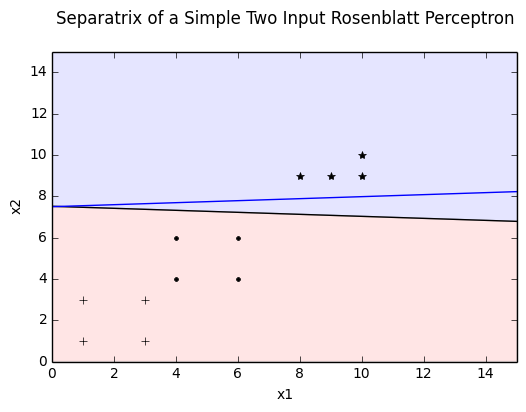

Class A pair [1.0, 1.0] is filter class [1.0,-1.0]
Class A pair [1.0, 3.0] is filter class [1.0,-1.0]
Class A pair [3.0, 1.0] is filter class [1.0,-1.0]
Class A pair [3.0, 3.0] is filter class [1.0,-1.0]

Class B pair [4.0, 4.0] is filter class [-1.0,-1.0]
Class B pair [4.0, 6.0] is filter class [-1.0,-1.0]
Class B pair [6.0, 4.0] is filter class [-1.0,-1.0]
Class B pair [6.0, 6.0] is filter class [-1.0,-1.0]
Class C pair [10.0, 10.0] is filter class [-1.0,1.0]
Class C pair [10.0, 9.0] is filter class [-1.0,1.0]
Class C pair [8.0, 9.0] is filter class [-1.0,1.0]
Class C pair [9.0, 9.0] is filter class [-1.0,1.0]
bias = 0.256787190312   weight_1 = -0.00166329252252   weight_2 = -0.0341927537601


In [3]:
%matplotlib inline

import numpy as np
import math as math
import matplotlib.pyplot as plt
import random as random

# The next function computes an error score goin through every pattern in both of classes
# A and B and adding a penalty of "+1" for each pattern in each class that is improperly
# classified.

def rosen_training_population_error(Class_A, Class_B, Class_C, bias, weight_1, weight_2):
    # Start Error Count at Zero
    error = 0 
    
    # Iterate through every pattern in Class A.  Feed the pattern through the
    # one neuron Rosenblatt Perceptron defined by the bias, weight_1 and weight_2 values
    # that were passed in.  We're assuming that class A patterns should all map to +1
    # and class B patterns should all map to -1.  Any pattern in either category that
    # does not properly map to its associated category will increase the error score 
    # by +1.  When every pattern has been tested, the error score is returned.
    
    for pattern in Class_A:  # class A should map to 1
        y = np.sign(bias + weight_1 * pattern[0] + weight_2 * pattern[1])
        if y < 0:  
            error += 1
    for pattern in Class_B:  # class B should map to -1
        y = np.sign(bias + weight_1 * pattern[0] + weight_2 * pattern[1])
        if y < 0:
            error += 1
    for pattern in Class_C:  # class C should map to -1
        y = np.sign(bias + weight_1 * pattern[0] + weight_2 * pattern[1])
        if y > 0:
            error += 1
    return error


        
random.seed()   # Seed the random number generator in the Python <random> package.

# Classes A and B.  These coorespond to the class lecture examples

Class_A = [[ 1.0,  1.0], [ 1.0,  3.0], [ 3.0,  1.0], [ 3.0,  3.0]]
#Class_B = [[10.0, 10.0], [ 8.0,  6.0], [14.0, 12.0], [ 9.0,  9.0]]
Class_B = [[4.0, 4.0], [ 4.0,  6.0], [ 6.0,  4.0], [ 6.0,  6.0]]
Class_C = [[ 10.0,  10.0], [ 10.0,  9.0], [ 8.0,  9.0], [ 9.0,  9.0]]
# Set a learning rate.  Remember, both too large or too small a learning rate are bad.  Refer to lecture notes.

learning_rate = 0.005

# Set initial weight and bias settings start with random values generated by the Python <random> package.

bias        =  random.uniform(0,1)
weight_1    =  random.uniform(0,1)
weight_2    =  random.uniform(0,1)

# Just so you can see how good or bad the initial guess for the decision boundary is, print out the
# number of patterns that are misclassified.  This is equivalent to printing out the 
# population error score.

print 'Inital count of misclassified patterns = {0}'.format(rosen_training_population_error(Class_A, Class_B, Class_C, bias, weight_1, weight_2))

# We're going to keep track of how many rounds of training we've done.  A round of training done on the WHOLE database of 
# training examples is called an "epoch".  Naturally, the count starts at zero before we do any training...

count = 0

# Now, begin training.  Training will continue until either every pattern in the training set is properly catagorized
# or there have been 10000 rounds of training (epochs), whichever happens first

while rosen_training_population_error(Class_A, Class_B, Class_C, bias, weight_1, weight_2) > 0 and count < 10000:

    # Make error correcting weight adjustments to the weights and biases for the Perceptron based on the 
    # error (if any) that each Class A pattern produces when run through the perceptron
    for pattern in Class_A:
        y = np.sign(bias + weight_1 * pattern[0] + weight_2 * pattern[1])
        weight_1 += learning_rate * (1.0 - y) * pattern[0]
        weight_2 += learning_rate * (1.0 - y) * pattern[1]
        bias     += learning_rate * (1.0 - y)

    # Make error correcting weight adjustments to the weights and biases for the Perceptron based on the 
    # error (if any) that each Class B pattern produces when run through the perceptron    
    for pattern in Class_B:
        y = np.sign(bias + weight_1 * pattern[0] + weight_2 * pattern[1])
        weight_1 += learning_rate * (1.0 - y) * pattern[0]
        weight_2 += learning_rate * (1.0 - y) * pattern[1]
        bias     += learning_rate * (1.0 - y)
        
    for pattern in Class_C:
        y = np.sign(bias + weight_1 * pattern[0] + weight_2 * pattern[1])
        weight_1 += learning_rate * (-1.0 - y) * pattern[0]
        weight_2 += learning_rate * (-1.0 - y) * pattern[1]
        bias     += learning_rate * (-1.0 - y)
        
    count +=1


# The while loop has terminated, print out how many epochs have elapsed.

print 'Training terminated at epoch {0}'.format(count)

# generate the linear decision boundary by the receptive field determined
# by the weight and bias selected above.

x1_separatrix_sample_points = np.linspace(-15.0, 15.0, num = 50)
print x1_separatrix_sample_points
x2_separatrix_sample_points = [((-weight_1 * x - bias)/weight_2) for x in x1_separatrix_sample_points]
x3_separatrix_sample_points = [(15.0-(-weight_1 * x - bias)/weight_2) for x in x1_separatrix_sample_points]
# set up the conditions of the plot (title, lables, ranges, etc.)
plt.title('Separatrix of a Simple Two Input Rosenblatt Perceptron\n')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis([0.0, 15.0, 0.0, 15.0])

# Now, plot the separatrix and the two classes
plt.plot(x1_separatrix_sample_points, x2_separatrix_sample_points, color = 'black')  # plot the separatrix
plt.plot(x1_separatrix_sample_points, x3_separatrix_sample_points, color = 'blue')
plt.fill_between(x1_separatrix_sample_points,0, x2_separatrix_sample_points, facecolor='red', alpha = 0.1)
plt.fill_between(x1_separatrix_sample_points,x2_separatrix_sample_points,15, facecolor='blue', alpha = 0.1)
plt.plot(*zip(*Class_A), marker='+', color = 'black', ls='')            # plot the class A pairs
plt.plot(*zip(*Class_B), marker='.', color = 'black', ls='')            # plot the class B pairs
plt.plot(*zip(*Class_C), marker='*', color = 'black', ls='')            # plot the class C pairs
plt.show()                                                          # show the plot

# now, let's print out the classes and what class membership the filter puts the points in
# as determined by the weight and bias you set

for x in Class_A:
    y = np.sign(bias + weight_1 * pattern[0] + weight_2 * pattern[1])
    if y > 0.0:
        print 'Class A pair {0} is filter class [1.0,-1.0]'.format(x)
    else:
        print 'Class A pair {0} is filter class [1.0,-1.0]'.format(x)


print

for x in Class_B:
    y = np.sign(bias + weight_1 * pattern[0] + weight_2 * pattern[1])
    if y > 0.0:
        print 'Class B pair {0} is filter class [-1.0,-1.0]'.format(x)
    else:
        print 'Class B pair {0} is filter class [-1.0,-1.0]'.format(x)

for x in Class_C:
    y = np.sign(bias + weight_1 * pattern[0] + weight_2 * pattern[1])
    if y < 0.0:
        print 'Class C pair {0} is filter class [-1.0,1.0]'.format(x)
    else:
        print 'Class C pair {0} is filter class [-1.0,1.0]'.format(x)

#print " Neuron","\t", "Class"
##print "1", "\t", "Class_A or Class_B"
#print "-1", "\t", "Class_C"

print 'bias = {0}   weight_1 = {1}   weight_2 = {2}'.format(bias,weight_1, weight_2)


Inital count of misclassified patterns = 4
Training terminated at epoch 6


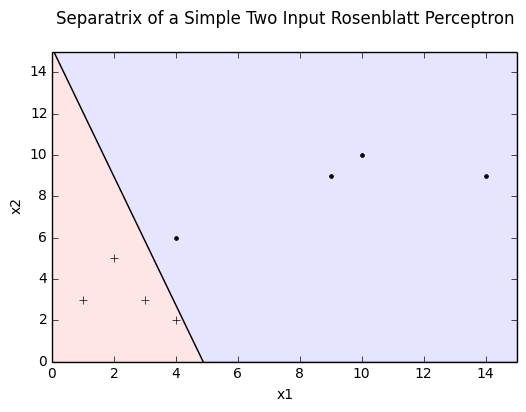

Class A pair [2, 5] is filter class NEGATIVE
Class A pair [1, 3] is filter class NEGATIVE
Class A pair [4, 2] is filter class NEGATIVE
Class A pair [3, 3] is filter class NEGATIVE

Class B pair [10, 10] is filter class POSITIVE
Class B pair [4, 6] is filter class POSITIVE
Class B pair [14, 9] is filter class POSITIVE
Class B pair [9, 9] is filter class POSITIVE

[bias, weight_1, weight_2] = [ 0.57879994 -0.11865959 -0.03810427]


In [2]:
%matplotlib inline

import numpy as np
import math as math
import matplotlib.pyplot as plt
import random as random

# The next function computes an error score goin through every pattern in both of classes
# A and B and adding a penalty of "+1" for each pattern in each class that is improperly
# classified.

def rosen_training_population_error(Class_A, Class_B, W_vector):
    # Start Error Count at Zero
    error = 0 
    
    # Iterate through every pattern in Class A.  Feed the pattern through the
    # one neuron Rosenblatt Perceptron defined by the weight vector W_vector.  The 
    # bias is in the zeroth slot of the vector and weights 1 and 2 in the first
    # and second slots of the vector respectively.
    #
    # We're assuming that class A patterns should all map to +1
    # and class B patterns should all map to -1.  Any pattern in either category that
    # does not properly map to its associated category will increase the error score 
    # by +1.  When every pattern has been tested, the error score is returned.
    
    for pattern in Class_A:  # class A should map to 1
        y = np.sign(np.dot(W_vector, [1] + pattern))
        if y < 0:  
            error += 1
    for pattern in Class_B:  # class B should map to -1
        y = np.sign(np.dot(W_vector, [1] + pattern))
        if y > 0:
            error += 1
    return error


        
random.seed()   # Seed the random number generator in the Python <random> package.

# Classes A and B.  These coorespond to the class lecture examples

#Class_A = [[ 1.0,  1.0], [ 1.0,  3.0], [ 4.0,  2.0], [ 3.0,  3.0]]
#Class_B = [[10.0, 10.0], [ 8.0,  6.0], [14.0, 12.0], [ 9.0,  9.0]]
Class_A= [[ 2, 5], [ 1, 3], [ 4, 2], [ 3, 3]]
Class_B= [[ 10, 10], [ 4, 6], [ 14, 9], [ 9, 9]]
# Set a learning rate.  Remember, both too large or too small a learning rate are bad.  Refer to lecture notes.

learning_rate = 0.005


# Set initial weight and bias settings start with random values generated by the Python <random> package.

W  =  np.random.rand(3)

# Just so you can see how good or bad the initial guess for the decision boundary is, print out the
# number of patterns that are misclassified.  This is equivalent to printing out the 
# population error score.

print 'Inital count of misclassified patterns = {0}'.format(rosen_training_population_error(Class_A, Class_B, W))

# We're going to keep track of how many rounds of training we've done.  A round of training done on the WHOLE database of 
# training examples is called an "epoch".  Naturally, the count starts at zero before we do any training...

count = 0

# Now, begin training.  Training will continue until either every pattern in the training set is properly catagorized
# or there have been 10000 rounds of training (epochs), whichever happens first

while rosen_training_population_error(Class_A, Class_B, W) > 0 and count < 10000:
    # Make error correcting weight adjustments to the weights and biases for the Perceptron based on the 
    # error (if any) that each Class A pattern produces when run through the perceptron
    for pattern in Class_A:
        y         = np.sign(np.dot(W, [1] + pattern))
        delta_W   = [x * (learning_rate * ( 1.0 - y)) for x in [1]+pattern] 
        W         = np.add(W,delta_W)

    # Make error correcting weight adjustments to the weights and biases for the Perceptron based on the 
    # error (if any) that each Class B pattern produces when run through the perceptron    
    for pattern in Class_B:
        y         = np.sign(np.dot(W, [1] + pattern))
        delta_W   = [x * (learning_rate * (-1.0 - y)) for x in [1]+pattern] 
        W         = np.add(W,delta_W)
        
    count +=1


# The while loop has terminated, print out how many epochs have elapsed.

print 'Training terminated at epoch {0}'.format(count)

# generate the linear decision boundary by the receptive field determined
# by the weight and bias selected above.

x1_separatrix_sample_points = np.linspace(-15.0, 15.0, num = 50)
x2_separatrix_sample_points = [((-W[1] * x - W[0])/W[2]) for x in x1_separatrix_sample_points]

# set up the conditions of the plot (title, lables, ranges, etc.)
plt.title('Separatrix of a Simple Two Input Rosenblatt Perceptron\n')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis([0.0, 15.0, 0.0, 15.0])

# Now, plot the separatrix and the two classes
plt.plot(x1_separatrix_sample_points, x2_separatrix_sample_points, color = 'black')  # plot the separatrix
plt.fill_between(x1_separatrix_sample_points,0, x2_separatrix_sample_points, facecolor='red', alpha = 0.1)
plt.fill_between(x1_separatrix_sample_points,x2_separatrix_sample_points,15, facecolor='blue', alpha = 0.1)
plt.plot(*zip(*Class_A), marker='+', color = 'black', ls='')            # plot the class A pairs
plt.plot(*zip(*Class_B), marker='.', color = 'black', ls='')            # plot the class A pairs
plt.show()                                                          # show the plot

# now, let's print out the classes and what class membership the filter puts the points in
# as determined by the weight and bias you set

for x in Class_A:
    y         = np.sign(np.dot(W, [1] + pattern))
    if y > 0.0:
        print 'Class A pair {0} is filter class POSITIVE'.format(x)
    else:
        print 'Class A pair {0} is filter class NEGATIVE'.format(x)


print

for x in Class_B:
    y         = np.sign(np.dot(W, [1] + pattern))
    if y < 0.0:
        print 'Class B pair {0} is filter class POSITIVE'.format(x)
    else:
        print 'Class B pair {0} is filter class NEGATIVE'.format(x)


print

print '[bias, weight_1, weight_2] = {0}'.format(W)


#### Informal Homework Exercise
As an exercise, rerun the cells that compute linear decision boundaries and examine the various places the learning algorithm may place them.  Note that the error correcting learning is NOT guaranteed to always create the same decision boundary for a data set.  Rather, starting from random conditions, it will incrementally move the boundary (and in more complex neural nets, the multiple boundaries) until all the data in the same classes appear in the same subspaces.  Compare this to the "move the fences until all the cows are inside" example from early class lectures.